# Areal Project

<div>
<img src="logo.jpg" width=150 ALIGN="left" border="20">
<h1> Starting Kit for preprocessed data</h1>
<br>This code was tested with <br>
Python 3.6.7 <br>
Created by Areal Team <br><br>
ALL INFORMATION, SOFTWARE, DOCUMENTATION, AND DATA ARE PROVIDED "AS-IS". The CDS, CHALEARN, AND/OR OTHER ORGANIZERS OR CODE AUTHORS DISCLAIM ANY EXPRESSED OR IMPLIED WARRANTIES, INCLUDING, BUT NOT LIMITED TO, THE IMPLIED WARRANTIES OF MERCHANTABILITY AND FITNESS FOR ANY PARTICULAR PURPOSE, AND THE WARRANTY OF NON-INFRIGEMENT OF ANY THIRD PARTY'S INTELLECTUAL PROPERTY RIGHTS. IN NO EVENT SHALL AUTHORS AND ORGANIZERS BE LIABLE FOR ANY SPECIAL, 
INDIRECT OR CONSEQUENTIAL DAMAGES OR ANY DAMAGES WHATSOEVER ARISING OUT OF OR IN CONNECTION WITH THE USE OR PERFORMANCE OF SOFTWARE, DOCUMENTS, MATERIALS, PUBLICATIONS, OR INFORMATION MADE AVAILABLE FOR THE CHALLENGE. 
</div>

<div>
    <h2>Introduction </h2>
     <br>
Aerial imagery has been a primary source of geographic data for quite a long time. With technology progress, aerial imagery became really practical for remote sensing : the science of obtaining information about an object, area or phenomenon.
Nowadays, there are many uses of image recognition spanning from robotics/drone vision to autonomous driving vehicules or face detection.
<br>
In this challenge, we will use pre-processed data, coming from landscape images. The goal is to learn to differentiate common and uncommon landscapes such as a beach, a lake or a meadow.
    Data comes from part of the data set (NWPU-RESISC45) originally used in <a href="https://arxiv.org/pdf/1703.00121.pdf?fbclid=IwAR16qo-EX_Z05ZpxvWG8F-oBU0SlnY-3BPCWBVVOGPyJcVy7BBqCKjnsvJo">Remote Sensing Image Scene Classification</a>. This data set contains 45 categories while we only kept 13 out of them.

References and credits: 
Yuliya Tarabalka, Guillaume Charpiat, Nicolas Girard for the data sets presentation.<br>
Gong Cheng, Junwei Han, and Xiaoqiang Lu, for the original article on the chosen data set.
</div>

### Requirements 

Our code uses multiple libraries, so the next cell will install python's required dependencies. In case you don't want to, or are running in the competition's docker, you can comment it.

In [1]:
!pip install --user -r requirements.txt

In [1]:
import numpy as np
import random
import re

In [2]:
model_dir = "sample_code_submission/"
result_dir = 'sample_result_submission/' 
problem_dir = 'ingestion_program/'  
score_dir = 'scoring_program/'

In [3]:
from sys import path; path.append(model_dir); path.append(problem_dir); path.append(score_dir);

<div>
    <h1> Step 1: Exploratory data analysis </h1>
<p>
We provide sample_data with the starting kit, but to prepare your submission, you must fetch the public_data from the challenge website and point to it.
</div>

<div>
<img src="CNN.png" width=800 align="center" border="20">
We used a special Convolutional Neural Network (CNN) already trained to recognize images in order to create the new data. To create it, we just kept the last form of the data, just before classification. <br>
This new form is highly similar to weights we can see in a classic neural network.
</div>

In [4]:
data_dir = '../../areal_pre_process'
data_name = 'Areal'

In [6]:
from ingestion_program.data_io import read_as_df
data = read_as_df(data_dir  + '/' + data_name)

Reading ../input_data/Areal_train from AutoML format
Number of examples = 1950
Number of features = 4096
        Class
0       beach
1   chaparral
2       cloud
3      desert
4      forest
5      island
6        lake
7      meadow
8    mountain
9       river
10    sea_ice
11   snowberg
12    wetland
Number of classes = 13


In [7]:
data.head()

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,...,feature_4088,feature_4089,feature_4090,feature_4091,feature_4092,feature_4093,feature_4094,feature_4095,feature_4096,target
0,0.0,0.0,0.0,0.000000,0.086625,0.0,0.000000,0.000000,0.0,0.0,...,0.000000,0.000000,0.0,2.014147,0.0,0.955390,0.0,0.0,0.000000,forest
1,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,...,0.000000,0.312153,0.0,0.000000,0.0,2.953564,0.0,0.0,1.072329,chaparral
2,0.0,0.0,0.0,2.515129,0.095439,0.0,0.045738,0.148969,0.0,0.0,...,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,chaparral
3,0.0,0.0,0.0,0.000000,1.188573,0.0,0.000000,0.000000,0.0,0.0,...,2.228957,1.464646,0.0,0.000000,0.0,1.624980,0.0,0.0,0.000000,beach
4,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,...,0.000000,2.063259,0.0,0.000000,0.0,1.344442,0.0,0.0,0.552447,river


In [8]:
data.describe()

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,...,feature_4087,feature_4088,feature_4089,feature_4090,feature_4091,feature_4092,feature_4093,feature_4094,feature_4095,feature_4096
count,1950.000000,1950.000000,1950.000000,1950.000000,1950.000000,1950.000000,1950.000000,1950.000000,1950.000000,1950.000000,...,1950.000000,1950.000000,1950.000000,1950.000000,1950.000000,1950.000000,1950.000000,1950.0,1950.000000,1950.000000
mean,0.004317,0.010288,0.034067,0.159602,0.287819,0.118016,0.018701,0.008692,0.017704,0.312748,...,0.002070,0.515079,0.576812,0.326190,0.009485,0.036949,1.610257,0.0,0.002303,1.310308
std,0.066446,0.115098,0.223729,0.586771,0.422939,0.467549,0.149851,0.129997,0.176760,0.585792,...,0.046132,1.141261,0.863400,0.928013,0.104382,0.278544,2.016739,0.0,0.057056,1.479086
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.035360,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.777434,0.0,0.000000,0.834617
75%,0.000000,0.000000,0.000000,0.000000,0.489434,0.000000,0.000000,0.000000,0.000000,0.400064,...,0.000000,0.331242,0.969007,0.000000,0.000000,0.000000,2.696507,0.0,0.000000,2.277018
max,1.822537,2.444004,3.386382,5.791842,2.641886,6.629262,2.414183,3.497651,3.156303,4.265208,...,1.430818,9.752917,4.911635,7.982585,2.014147,4.751409,10.635340,0.0,1.940443,7.560251


In [9]:
print(data.iloc[:, -1:])
X = data.iloc[:, :-1]
y = data.iloc[:, -1:]

         target
0        forest
1     chaparral
2     chaparral
3         beach
4         river
5         beach
6     chaparral
7         cloud
8        forest
9     chaparral
10       island
11      sea_ice
12       meadow
13        river
14       forest
15       desert
16        cloud
17        river
18       island
19       meadow
20        river
21        beach
22        beach
23        beach
24     mountain
25        river
26      wetland
27        cloud
28        cloud
29         lake
...         ...
1920      beach
1921      cloud
1922      cloud
1923      river
1924    wetland
1925     desert
1926      river
1927    sea_ice
1928   mountain
1929      beach
1930  chaparral
1931     island
1932  chaparral
1933     island
1934     meadow
1935  chaparral
1936     island
1937   snowberg
1938     forest
1939      beach
1940     meadow
1941   mountain
1942  chaparral
1943   snowberg
1944  chaparral
1945   snowberg
1946     desert
1947      cloud
1948  chaparral
1949       lake

[1950 r

### Visualization of values

Most values are in the range (0, 5), with many really close to 0, and more than half are zero.

In [10]:
number_0 = (data.iloc[:,:-1] == 0).sum().sum()
total_number = (data.iloc[:,:-1] == 0).sum().sum() + (data.iloc[:,:-1] != 0).sum().sum()
print("Proportion of zeros : {:.2%}".format(number_0 / total_number))
print("Proportion of values inferior to 5 : {:.2%}".format((data.iloc[:,:-1] < 5).sum().sum() / total_number))

Proportion of zeros : 86.12%
Proportion of values inferior to 5 : 99.27%


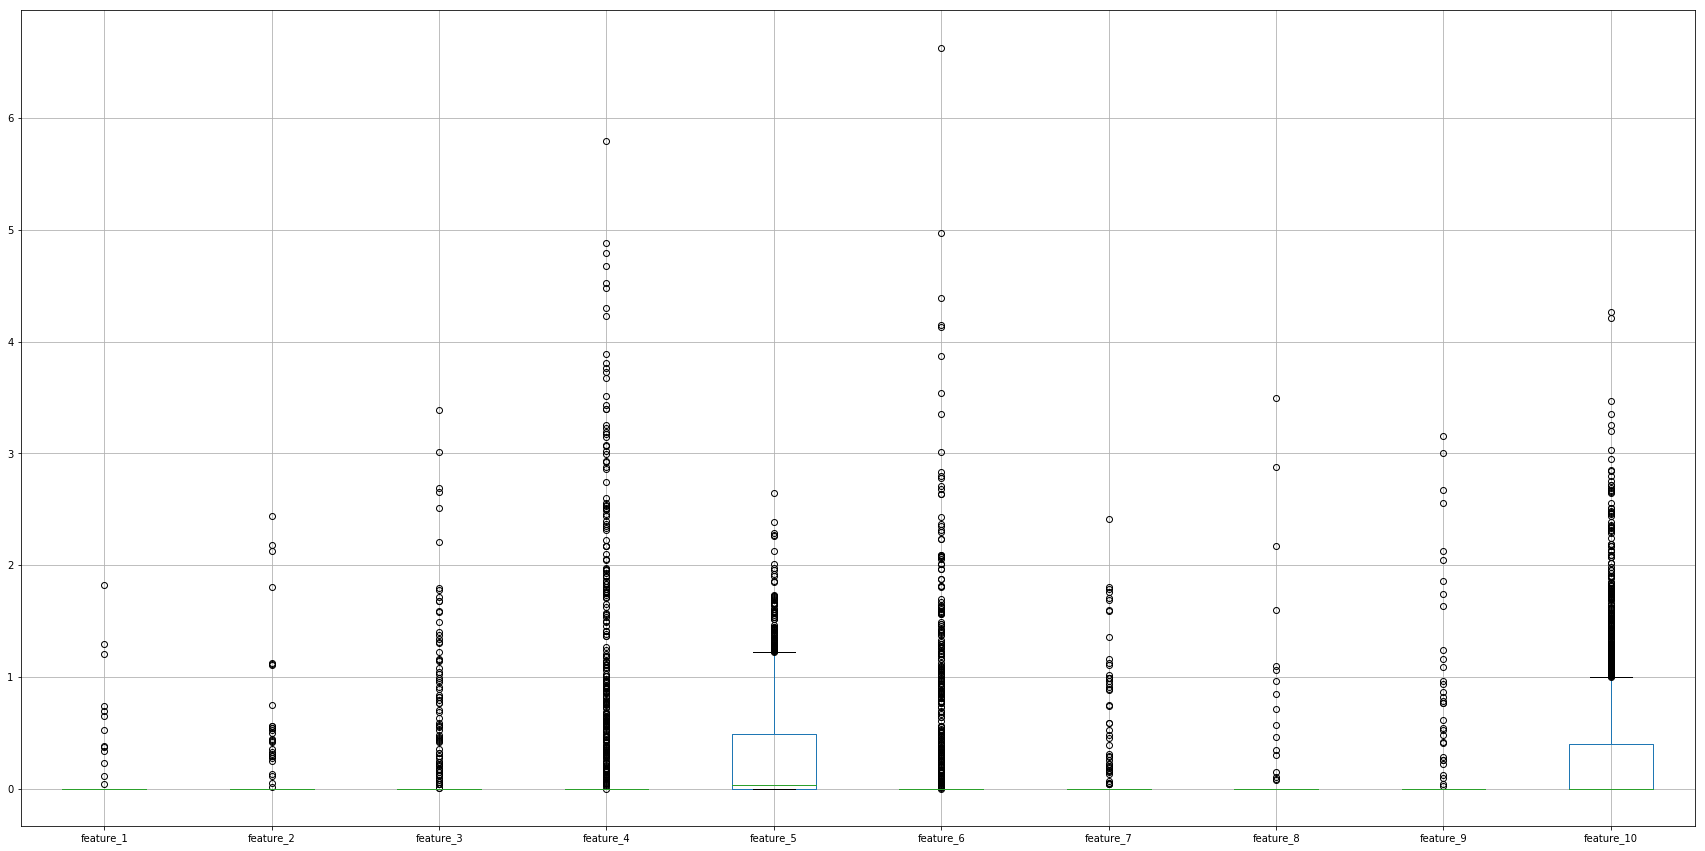

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(30,15))
# Plot values of first 10 features
data_plot=data.iloc[:,:10]
data_plot.boxplot()
plt.show()

### Visualisation as images

Although any human won't be able to make sense of those images, it is by far simpler and faster for computers to correctly recognize those "images" and assign them their correct classes.

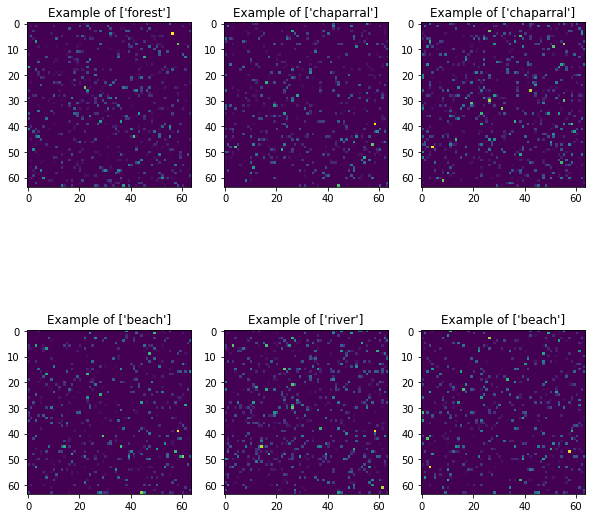

In [12]:
import matplotlib.image as mpimg

num_toshow = 6
fig, _axs = plt.subplots(nrows=2, ncols=3, figsize=(10,10))
fig.subplots_adjust(hspace=0.3)
axs = _axs.flatten()

for i in range(num_toshow):
    img = data.iloc[i].values[:-1].reshape(64, 64)
    label = data.values[i][-1:]
    axs[i].set_title('Example of {}'.format(label))
    axs[i].imshow(img.astype(float))

plt.show()

# Step 2: Building a predictive model

Use DataManager to separate data for train, validation and test

In [5]:
from data_manager import DataManager
D = DataManager(data_name, data_dir)
print(D)

Info file found : /home/samuel/Documents/Cours/M2_AIC/Mini-projet/areal_pre_process/Areal_public.info
DataManager : Areal
info:
	usage = Sample dataset Areal preprocessed data
	name = areal
	task = multiclass.classification
	target_type = Categorical
	feat_type = Numerical
	metric = accuracy
	time_budget = 12000
	feat_num = 4096
	target_num = 13
	label_num = 13
	train_num = 1950
	valid_num = 1950
	test_num = 5200
	has_categorical = 0
	has_missing = 0
	is_sparse = 0
	format = dense
data:
	X_train = array(1950, 4096)
	Y_train = array(1950, 1)
	X_valid = array(1950, 4096)
	Y_valid = array(0,)
	X_test = array(5200, 4096)
	Y_test = array(0,)
feat_type:	array(4096,)
feat_idx:	array(0,)



Get data and labels by calling D.data (DataManager.data)

In [6]:
X_train = D.data['X_train']
Y_train = D.data['Y_train']

In [36]:
from model import SimpleDecisionTree

In [46]:
M = SimpleDecisionTree()

In [73]:
from sklearn.model_selection import GridSearchCV

In [85]:
from sklearn.ensemble import RandomForestClassifier
parameters = {'n_estimators' : (500, 750, 1000), 'max_depth':(10,20, 25), 'max_features':(100, 250, 500)}
M = RandomForestClassifier(n_estimators=750, max_depth=25, max_features=250)
clf = GridSearchCV(M, parameters, cv=3)

Results grid searchCV 64% best

In [84]:
from sklearn.neural_network import MLPClassifier
parameters = {'hidden_layer_sizes': ((2000,1000,500,100), (1000, 500, 100), (500, 100), ((100))), 'max_iter':(10,50, 100, 200, 500)}
M = MLPClassifier(hidden_layer_sizes=(500,100), max_iter=100)
clf2 = GridSearchCV(M, parameters, cv=3)

Results > 65%

In [65]:
from xgboost import XGBClassifier
M = XGBClassifier()

In [87]:
from lightgbm import LGBMClassifier
M = LGBMClassifier()

In [81]:
import pandas as pd
clf.fit(X_train, Y_train.reshape(-1))
pd.DataFrame(clf.cv_results_)

/home/keanu/.local/lib/python3.7/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/home/keanu/.local/lib/python3.7/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/home/keanu/.local/lib/python3.7/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('split2_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/home/keanu/.local/lib/python3.7/site-packa

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_max_features,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,7.982615,0.042971,0.096346,0.000393,10,100,500,"{'max_depth': 10, 'max_features': 100, 'n_esti...",0.609231,0.606154,0.647692,0.621026,0.018898,23,1.000000,1.000000,1.0,1.000000,0.000000
1,12.002991,0.004401,0.141631,0.000722,10,100,750,"{'max_depth': 10, 'max_features': 100, 'n_esti...",0.612308,0.609231,0.660000,0.627179,0.023242,17,1.000000,1.000000,1.0,1.000000,0.000000
2,16.172481,0.257674,0.211408,0.017738,10,100,1000,"{'max_depth': 10, 'max_features': 100, 'n_esti...",0.621538,0.603077,0.644615,0.623077,0.016993,22,1.000000,1.000000,1.0,1.000000,0.000000
3,18.415681,0.147038,0.096387,0.001203,10,250,500,"{'max_depth': 10, 'max_features': 250, 'n_esti...",0.607692,0.606154,0.640000,0.617949,0.015605,24,0.999231,1.000000,1.0,0.999744,0.000363
4,27.779314,0.278158,0.139998,0.001508,10,250,750,"{'max_depth': 10, 'max_features': 250, 'n_esti...",0.621538,0.610769,0.644615,0.625641,0.014119,19,0.999231,1.000000,1.0,0.999744,0.000363
5,37.040006,0.112129,0.200993,0.016259,10,250,1000,"{'max_depth': 10, 'max_features': 250, 'n_esti...",0.612308,0.612308,0.647692,0.624103,0.016680,20,0.999231,0.999231,1.0,0.999487,0.000363
6,35.318095,0.527695,0.092542,0.001292,10,500,500,"{'max_depth': 10, 'max_features': 500, 'n_esti...",0.604615,0.604615,0.629231,0.612821,0.011604,27,0.996923,0.999231,1.0,0.998718,0.001307
7,53.175017,0.495139,0.145219,0.007200,10,500,750,"{'max_depth': 10, 'max_features': 500, 'n_esti...",0.609231,0.601538,0.635385,0.615385,0.014487,26,0.997692,0.998462,1.0,0.998718,0.000959
8,71.038947,0.584978,0.189317,0.014180,10,500,1000,"{'max_depth': 10, 'max_features': 500, 'n_esti...",0.603077,0.606154,0.644615,0.617949,0.018898,24,0.997692,0.998462,1.0,0.998718,0.000959
9,10.031083,0.043763,0.131069,0.016300,20,100,500,"{'max_depth': 20, 'max_features': 100, 'n_esti...",0.627692,0.618462,0.643077,0.629744,0.010153,14,1.000000,1.000000,1.0,1.000000,0.000000


In [86]:
import pandas as pd
clf2.fit(X_train, Y_train.reshape(-1))
pd.DataFrame(clf2.cv_results_)

/home/keanu/.local/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/keanu/.local/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/keanu/.local/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/keanu/.local/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_it

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_hidden_layer_sizes,param_max_iter,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,33.945946,0.151772,0.218556,0.015880,"(2000, 1000, 500, 100)",10,"{'hidden_layer_sizes': (2000, 1000, 500, 100),...",0.658462,0.681538,0.689231,0.676410,0.013074,15,0.999231,1.0,0.996923,0.998718,0.001307
1,104.918982,2.111067,0.223823,0.014063,"(2000, 1000, 500, 100)",50,"{'hidden_layer_sizes': (2000, 1000, 500, 100),...",0.670769,0.676923,0.693846,0.680513,0.009757,9,1.000000,1.0,1.000000,1.000000,0.000000
2,105.905965,1.873795,0.240872,0.044478,"(2000, 1000, 500, 100)",100,"{'hidden_layer_sizes': (2000, 1000, 500, 100),...",0.683077,0.672308,0.695385,0.683590,0.009428,6,1.000000,1.0,1.000000,1.000000,0.000000
3,108.302534,5.459538,0.209926,0.008250,"(2000, 1000, 500, 100)",200,"{'hidden_layer_sizes': (2000, 1000, 500, 100),...",0.693846,0.678462,0.684615,0.685641,0.006322,4,1.000000,1.0,1.000000,1.000000,0.000000
4,101.214927,3.107188,0.211960,0.003758,"(2000, 1000, 500, 100)",500,"{'hidden_layer_sizes': (2000, 1000, 500, 100),...",0.690769,0.656923,0.684615,0.677436,0.014721,13,1.000000,1.0,1.000000,1.000000,0.000000
5,11.903240,0.095286,0.092819,0.000788,"(1000, 500, 100)",10,"{'hidden_layer_sizes': (1000, 500, 100), 'max_...",0.669231,0.683077,0.680000,0.677436,0.005936,13,1.000000,1.0,1.000000,1.000000,0.000000
6,37.977757,1.058414,0.095424,0.004365,"(1000, 500, 100)",50,"{'hidden_layer_sizes': (1000, 500, 100), 'max_...",0.663077,0.670769,0.695385,0.676410,0.013780,15,1.000000,1.0,1.000000,1.000000,0.000000
7,36.070319,1.515448,0.123146,0.043398,"(1000, 500, 100)",100,"{'hidden_layer_sizes': (1000, 500, 100), 'max_...",0.673846,0.686154,0.690769,0.683590,0.007143,6,1.000000,1.0,1.000000,1.000000,0.000000
8,38.933606,1.367621,0.091081,0.000811,"(1000, 500, 100)",200,"{'hidden_layer_sizes': (1000, 500, 100), 'max_...",0.689231,0.678462,0.692308,0.686667,0.005936,3,1.000000,1.0,1.000000,1.000000,0.000000
9,36.578230,0.933430,0.092366,0.000650,"(1000, 500, 100)",500,"{'hidden_layer_sizes': (1000, 500, 100), 'max_...",0.693846,0.678462,0.689231,0.687179,0.006446,2,1.000000,1.0,1.000000,1.000000,0.000000


#### Fit the model

Data as first argument, Labels as second, with .reshape(-1) to make sure that the array containing labels is flat and don't have multiple dimensions.

In [88]:
M.fit(X_train, Y_train.reshape(-1))

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
        importance_type='split', learning_rate=0.1, max_depth=-1,
        min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
        n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
        random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
        subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [89]:
Y_hat_train = M.predict(D.data['X_train'])
Y_hat_valid = M.predict(D.data['X_valid'])
Y_hat_test = M.predict(D.data['X_test'])

In [90]:
# m.save(trained_model_name)                 
# result_name = result_dir + data_name
# from data_io import write
# from data_io import mkdir
# mkdir(result_dir)

# write(result_name + '_train.predict', Y_hat_train)
# write(result_name + '_valid.predict', Y_hat_valid)
# write(result_name + '_test.predict', Y_hat_test)
# !ls $result_name*

# Scoring predictions

In [91]:
# from libscores import get_metric
# metric_name, scoring_function = get_metric()
# print('Using scoring metric:', metric_name)

In [92]:
print('Ideal score for the', metric_name, 'metric = %5.4f' % scoring_function(Y_train, Y_train), "\n")

print("Scores with BaselineModel")
print('Training score for the', metric_name, 'metric = %5.4f' % scoring_function(Y_train, Y_hat_train))
if len(D.data['Y_valid'] > 0) and len(D.data['Y_test'] > 0):
    print('Validation score for the', metric_name, 'metric = %5.4f' % scoring_function(D.data['Y_valid'], Y_hat_valid))
    print('Test score for the', metric_name, 'metric = %5.4f' % scoring_function(D.data['Y_test'], Y_hat_test))

Ideal score for the accuracy metric = 1.0000 

Scores with BaselineModel
Training score for the accuracy metric = 1.0000
Validation score for the accuracy metric = 0.6472
Test score for the accuracy metric = 0.6446


Keep in mind that the provided model is one that heavily overfits so you shouldn't look too much at the training score.

Using cross-validation (see a bit below) will give more significant results.

## Confusion matrix

Doesn't have much value on train with a 100% accuracy, but it can be good to look at if you change your model.

In [44]:
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_train, Y_hat_train)

array([[150,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0, 150,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0, 150,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0, 150,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0, 150,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0, 150,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0, 150,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0, 150,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0, 150,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0, 150,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 150,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 150,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 150]])

# Cross-validation

Because validation and test labels should first not be available, we do cross validation to see our models quality

In [45]:
from sklearn.metrics import make_scorer
from sklearn.model_selection import cross_val_score

scores = cross_val_score(SimpleDecisionTree(), X_train, Y_train, cv=5, scoring=make_scorer(scoring_function))
print('\nCV score (95 perc. CI): %0.2f (+/- %0.2f)' % (scores.mean(), scores.std() * 2))

FIT: dim(X)= [1560, 4096]
FIT: dim(y)= [1560, 1]
PREDICT: dim(X)= [390, 4096]
PREDICT: dim(y)= [390, 1]
FIT: dim(X)= [1560, 4096]
FIT: dim(y)= [1560, 1]
PREDICT: dim(X)= [390, 4096]
PREDICT: dim(y)= [390, 1]
FIT: dim(X)= [1560, 4096]
FIT: dim(y)= [1560, 1]
PREDICT: dim(X)= [390, 4096]
PREDICT: dim(y)= [390, 1]
FIT: dim(X)= [1560, 4096]
FIT: dim(y)= [1560, 1]
PREDICT: dim(X)= [390, 4096]
PREDICT: dim(y)= [390, 1]
FIT: dim(X)= [1560, 4096]
FIT: dim(y)= [1560, 1]
PREDICT: dim(X)= [390, 4096]
PREDICT: dim(y)= [390, 1]

CV score (95 perc. CI): 0.36 (+/- 0.03)


## T-SNE & PAC

In [26]:
label_dict = {
    0: "beach",
1: "chaparral",
2: "cloud",
3: "desert",
4: "forest",
5: "island",
6: "lake",
7: "meadow",
8: "mountain",
9: "river",
10: "sea_ice",
11: "snowberg",
12: "wetland"}

In [7]:
from sklearn.manifold import TSNE

### 2D reduction

In [8]:
tsne = TSNE(n_components=2)

In [9]:
out_tsne = tsne.fit_transform(X_train)

In [10]:
print(out_tsne.shape)

(1950, 2)


In [11]:
import matplotlib.pyplot as plt

In [16]:
# https://stackoverflow.com/questions/14720331/how-to-generate-random-colors-in-matplotlib
def get_cmap(n, name='hsv'):
    '''Returns a function that maps each index in 0, 1, ..., n-1 to a distinct 
    RGB color; the keyword argument name must be a standard mpl colormap name.'''
    return plt.cm.get_cmap(name, n)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

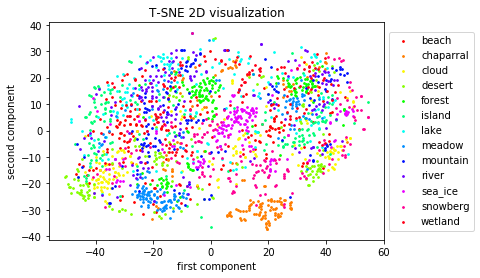

In [28]:
cmap = get_cmap(13)
for i in range(13):
    tmp = Y_train.reshape(-1)==i
    plt.scatter(out_tsne[tmp, 0], out_tsne[tmp, 1], label=label_dict[i], c=cmap(i), s=3)
plt.title("T-SNE 2D visualization")
plt.xlabel("first component")
plt.ylabel("second component")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

In [22]:
from sklearn.decomposition import PCA

In [23]:
pca = PCA(n_components=2)

In [24]:
out_pca = pca.fit_transform(X_train)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

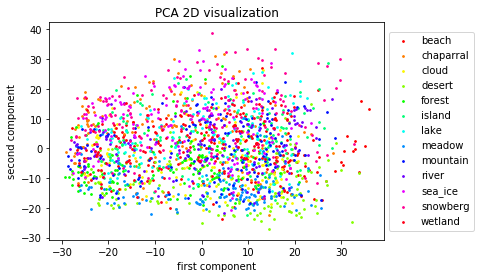

In [29]:
cmap = get_cmap(13)
for i in range(13):
    tmp = Y_train.reshape(-1)==i
    plt.scatter(out_pca[tmp, 0], out_pca[tmp, 1], label=label_dict[i], c=cmap(i), s=3)
plt.title("PCA 2D visualization")
plt.xlabel("first component")
plt.ylabel("second component")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

### 3D reduction

In [33]:
from mpl_toolkits.mplot3d import Axes3D

In [30]:
tsne3d = TSNE(n_components=3)

In [31]:
out_tsne3d = tsne3d.fit_transform(X_train)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

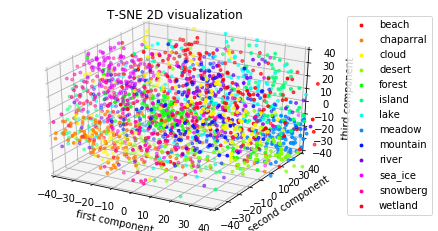

In [42]:
cmap = get_cmap(13)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
for i in range(13):
    tmp = Y_train.reshape(-1)==i
    ax.scatter(out_tsne3d[tmp, 0], out_tsne3d[tmp, 1], out_tsne3d[tmp, 2], label=label_dict[i], c=cmap(i), s=8)
plt.title("T-SNE 2D visualization")
ax.set_xlim3d(-40, 40)
ax.set_ylim3d(-40, 40)
ax.set_zlim3d(-40, 40)
ax.set_xlabel("first component")
ax.set_ylabel("second component")
ax.set_zlabel("third component")
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

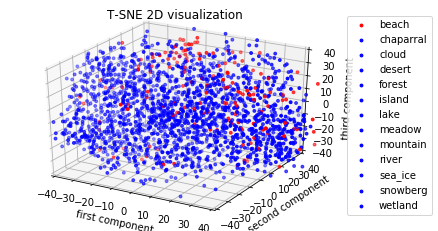

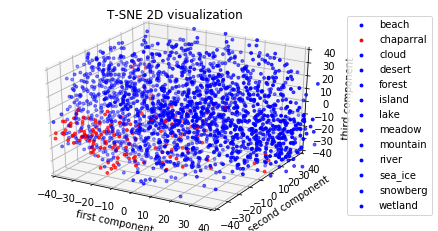

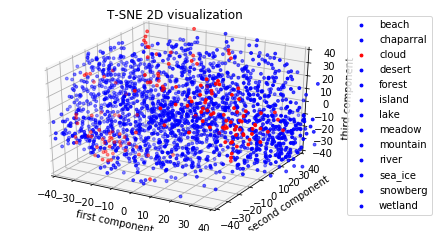

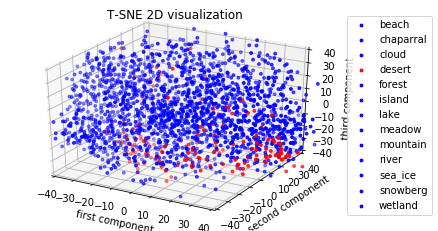

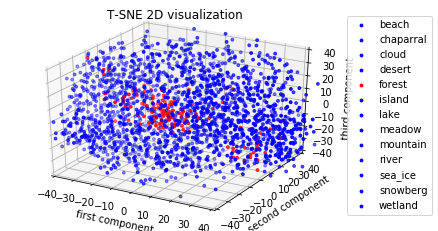

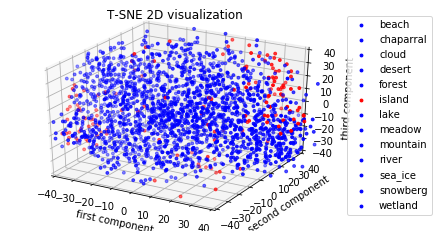

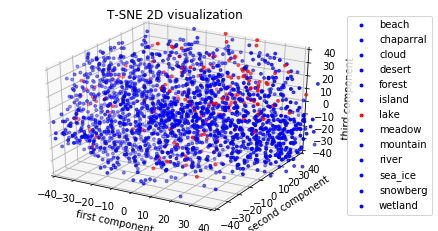

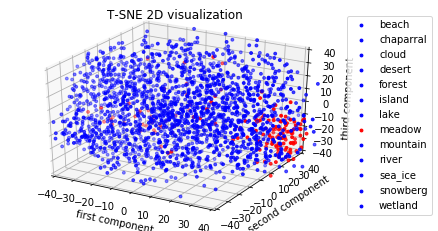

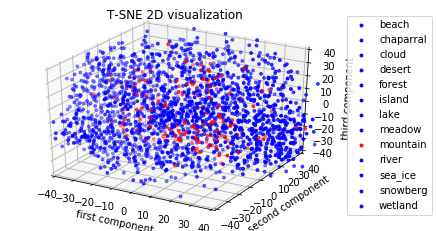

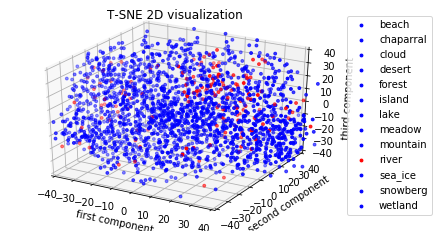

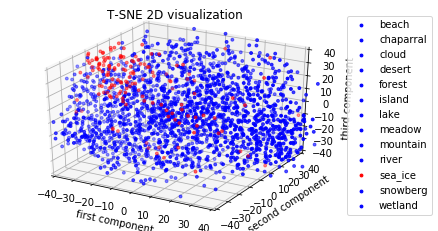

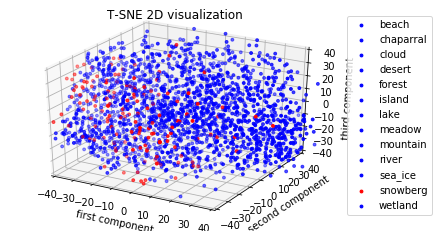

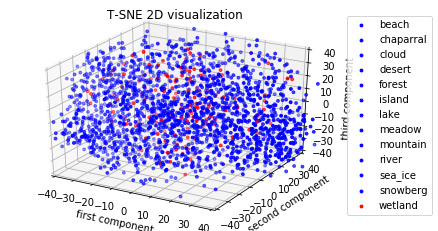

In [60]:
cmap = get_cmap(13)
colors = {True: 'r', False: 'b'}
for classe in range(13):  
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    for i in range(13):
        tmp = Y_train.reshape(-1)==i
        ax.scatter(out_tsne3d[tmp, 0], out_tsne3d[tmp, 1], out_tsne3d[tmp, 2], label=label_dict[i], c=colors[classe == i], s=8)
    plt.title("T-SNE 2D visualization")
    ax.set_xlim3d(-40, 40)
    ax.set_ylim3d(-40, 40)
    ax.set_zlim3d(-40, 40)
    ax.set_xlabel("first component")
    ax.set_ylabel("second component")
    ax.set_zlabel("third component")
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.show()

# Submission

## Example

Example needs to have python3 installed

Test to see whether submission with ingestion program is working

In [24]:
!python3 $problem_dir/ingestion.py $data_dir $result_dir $problem_dir $model_dir

Using input_dir: /home/keanu/Documents/CoursMPI/M2/Projet/Remote-Sensing-Image/starting_kit_preprocessed/sample_data
Using output_dir: /home/keanu/Documents/CoursMPI/M2/Projet/Remote-Sensing-Image/starting_kit_preprocessed/sample_result_submission
Using program_dir: /home/keanu/Documents/CoursMPI/M2/Projet/Remote-Sensing-Image/starting_kit_preprocessed/ingestion_program
Using submission_dir: /home/keanu/Documents/CoursMPI/M2/Projet/Remote-Sensing-Image/starting_kit_preprocessed/sample_code_submission

========== Ingestion program version 6 ==========

************************************************
******** Processing dataset Areal ********
************************************************
========= Reading and converting data ==========
Info file found : /home/keanu/Documents/CoursMPI/M2/Projet/Remote-Sensing-Image/starting_kit_preprocessed/sample_data/Areal_public.info
========= Reading /home/keanu/Documents/CoursMPI/M2/Projet/Remote-Sensing-Image/starting_kit_preprocessed/sample_dat

### Test scoring program

In [25]:
scoring_output_dir = 'scoring_output'
!python3 $score_dir/score.py $data_dir $result_dir $scoring_output_dir

======= Set 1 (Areal_test): accuracy(set1_score)=0.280000000000 =======
======= Set 2 (Areal_train): accuracy(set2_score)=1.000000000000 =======
======= Set 3 (Areal_valid): accuracy(set3_score)=0.330000000000 =======


# Prepare the submission

In [26]:
import datetime 
from data_io import zipdir
the_date = datetime.datetime.now().strftime("%y-%m-%d-%H-%M")
sample_code_submission = './sample_code_submission_prep_' + the_date + '.zip'
sample_result_submission = './sample_result_submission_prep_' + the_date + '.zip'
zipdir(sample_code_submission, model_dir)
zipdir(sample_result_submission, result_dir)
print("Submit one of these files:\n" + sample_code_submission + "\n" + sample_result_submission)

Submit one of these files:
./sample_code_submission_prep_19-01-11-18-34.zip
./sample_result_submission_prep_19-01-11-18-34.zip
